# ENSEMBLE TECHNIQUES

### Import Libraries

In [1]:
# !pip install pydotplus

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

import pydotplus as pydot
from IPython.display import Image
from os import system


In [3]:
creditdata=pd.read_csv('credit.csv')
creditdata.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
creditdata.shape

(1000, 17)

In [5]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

- Let's convert the columns with an 'object' datatype into categorical variables

In [6]:
for feature in creditdata.columns:
    if creditdata[feature].dtype == 'object':
        creditdata[feature]=pd.Categorical(creditdata[feature])
creditdata.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [7]:
creditdata.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [8]:
print(creditdata.checking_balance.value_counts())
print("==================================================")
print(creditdata.credit_history.value_counts())
print("==================================================")
print(creditdata.purpose.value_counts())
print("==================================================")
print(creditdata.savings_balance.value_counts())
print("==================================================")
print(creditdata.employment_duration.value_counts())
print("==================================================")
print(creditdata.other_credit.value_counts())
print("==================================================")
print(creditdata.housing.value_counts())
print("==================================================")
print(creditdata.job.value_counts())
print("==================================================")
print(creditdata.phone.value_counts())
print("==================================================")
print(creditdata.default.value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [9]:
# Features with order in their categories
replaceStruct={
                'checking_balance':{
                '< 0 DM':1,
                '1 - 200 DM':2,
                '> 200 DM':3,
                'unknown':-1
                },
    
                'credit_history':{
                'good':0,
                'critical':1,
                'poor':2,    
                'very good':3,
                'perfect':4
                }, 
                
                'savings_balance':{
                '< 100 DM':1,
                '100 - 500 DM':2,
                '500 - 1000 DM':3,
                '> 1000 DM':4,
                'unknown':-1
                },
    
                'employment_duration':{
                '1 - 4 years':1, 
                '> 7 years':2,      
                '4 - 7 years':3,
                'unemployed':-1,
                '< 1 year':4,             
                },
                
                'phone':{
                'no':1,
                'yes':2,
                },
                'default':{
                'no':0,
                'yes':1
                }
    
    }

In [10]:
# Features with No orders in their catergories
oneHotCols=['purpose','housing','other_credit','job']

In [11]:
creditdata=creditdata.replace(replaceStruct)
creditdata=pd.get_dummies(creditdata,columns=oneHotCols)
creditdata.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,2,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,0,5951,1,1,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,3,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,0,7882,1,3,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,1,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,0,9055,-1,1,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,0,2835,3,2,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,0,6948,1,1,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,0,3059,4,3,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,-1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [12]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [13]:
print(creditdata.checking_balance.value_counts())
print("==================================================")
print(creditdata.credit_history.value_counts())
print("==================================================")
# print(creditdata.purpose.value_counts())
# print("==================================================")
print(creditdata.savings_balance.value_counts())
print("==================================================")
print(creditdata.employment_duration.value_counts())
print("==================================================")
# print(creditdata.other_credit.value_counts())
# print("==================================================")
# print(creditdata.housing.value_counts())
# print("==================================================")
# print(creditdata.job.value_counts())
# print("==================================================")
print(creditdata.phone.value_counts())
print("==================================================")
print(creditdata.default.value_counts())

-1    394
1     274
2     269
3      63
Name: checking_balance, dtype: int64
0    530
1    293
2     88
3     49
4     40
Name: credit_history, dtype: int64
1     603
-1    183
2     103
3      63
4      48
Name: savings_balance, dtype: int64
1     339
2     253
3     174
4     172
-1     62
Name: employment_duration, dtype: int64
1    596
2    404
Name: phone, dtype: int64
0    700
1    300
Name: default, dtype: int64


In [14]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [15]:
creditdata=creditdata.astype({'phone':'int64','default':'int64','checking_balance':'int64','credit_history':'int64','savings_balance':'int64','employment_duration':'int64'})

In [16]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

### Split Data

In [17]:
X=creditdata.drop('default',axis=1)
Y=creditdata.pop('default')

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

### Build Decision Tree Model

- We will build model using the DecisionTreeClassifier function, Using default 'gini' criterian to split, other option include 'Entropy'.

In [19]:
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [20]:
print(dTree.score(X_train,Y_train))
print(dTree.score(X_test,Y_test))

1.0
0.6666666666666666


### Visulalizing the Decision Tree

In [21]:
train_char_label=['No','Yes']
Credit_Tree_File=open('credit_tree.dot','w')
dot_data=tree.export_graphviz(dTree,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=list(train_char_label))
Credit_Tree_File.close()

In [22]:
# !pip install graphviz

In [23]:
# #Works only if "dot" command works on you machine

# retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
# if(retCode>0):
#     print("system command returning error: "+str(retCode))
# else:
#     display(Image("credit_tree.png"))

In [24]:
creditdata.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,2,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,0,5951,1,1,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,3,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,0,7882,1,3,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,1,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


## Prunnig : Reducing Overfitting (Regularization)

In [25]:
dTreeR=DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=8)
dTreeR.fit(X_train,Y_train)
print(dTreeR.score(X_train,Y_train))
print(dTreeR.score(X_test,Y_test))

0.9157142857142857
0.6866666666666666


In [26]:
print(pd.DataFrame(dTreeR.feature_importances_,columns=['Imp'],index=X_train.columns))

                                   Imp
checking_balance              0.167220
months_loan_duration          0.080967
credit_history                0.053085
amount                        0.228222
savings_balance               0.065535
employment_duration           0.068067
percent_of_income             0.040468
years_at_residence            0.024813
age                           0.113192
existing_loans_count          0.033626
dependents                    0.000000
phone                         0.007244
purpose_business              0.013184
purpose_car                   0.002714
purpose_car0                  0.000000
purpose_education             0.000000
purpose_furniture/appliances  0.018567
purpose_renovations           0.000000
housing_other                 0.009579
housing_own                   0.011454
housing_rent                  0.000000
other_credit_bank             0.012112
other_credit_none             0.032679
other_credit_store            0.008240
job_management           

0.6866666666666666


<AxesSubplot:>

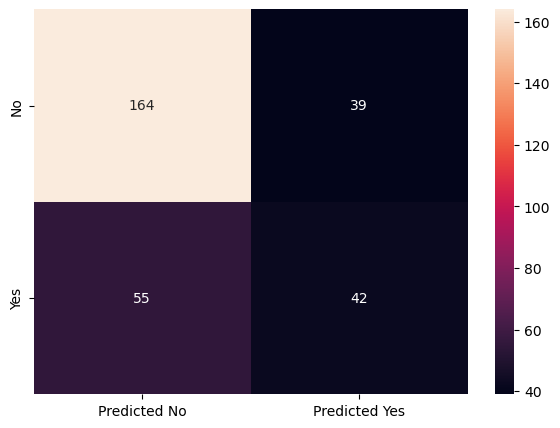

In [27]:
print(dTreeR.score(X_test,Y_test))
Y_predict=dTreeR.predict(X_test)

cm=metrics.confusion_matrix(Y_test,Y_predict,labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],columns= [i for i in ['Predicted No','Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Ensemble Learning- Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

bgc1=BaggingClassifier(base_estimator=dTree,n_estimators=10,random_state=1)
# bgc1=BaggingClassifier(n_estimators=50,random_state=1)

bgc1=bgc1.fit(X_train,Y_train)

0.7566666666666667


<AxesSubplot:>

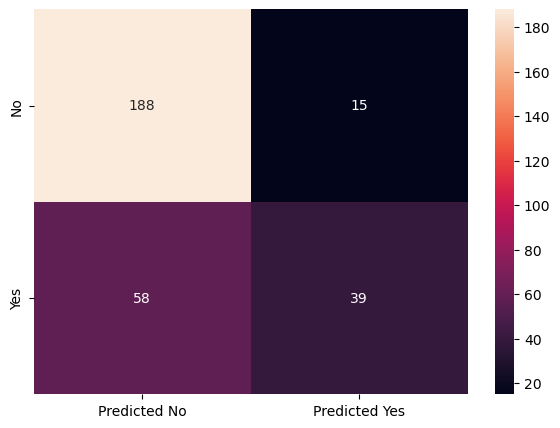

In [29]:
Y_predict=bgc1.predict(X_test)

print(bgc1.score(X_test,Y_test))

cm=metrics.confusion_matrix(Y_test,Y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],columns=[i for i in ['Predicted No','Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [30]:
print(bgc1.score(X_train,Y_train))
print(bgc1.score(X_test,Y_test))

0.9857142857142858
0.7566666666666667


## Ensemble Learning-AdaBoosting

Here it builds on simple models and each model builds on the errors or residuals of the previous model in sequence. If you try to use the complex base model **base_estimator=dTree** , you will realize that it does quite poor, this is because the first model in the sequence does really well and the rest of the models does not really have much to do and they end up hurting the first model instead of helping.You can rather use the **base_estimator=dTreeR** which is a simple model and you will realise some improvemnt.

The best approach is to leave the AdaBoost to figure it out and start with very simple base model with a depth of 1

In [31]:
from sklearn.ensemble import AdaBoostClassifier
abc1=AdaBoostClassifier(n_estimators=11,random_state=1)
# abc1=AdaBoostClassifier(base_estimator=dTreeR,n_estimators=11,random_state=1)
abc1=abc1.fit(X_train,Y_train)

0.7333333333333333


<AxesSubplot:>

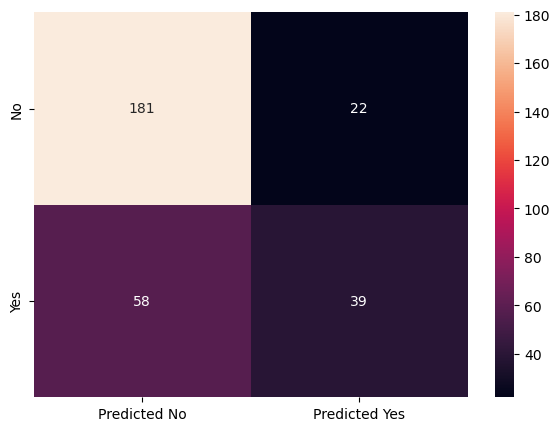

In [32]:
Y_predict=abc1.predict(X_test)
print(abc1.score(X_test,Y_test))

cm=metrics.confusion_matrix(Y_test,Y_predict,labels=[0,1])

df_cm=round(pd.DataFrame(cm,index=[i for i in ['No','Yes']],columns=[i for i in ['Predicted No','Predicted Yes']]),2)

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Ensemble Learning- GradientBoost

Gradient Boost also uses simple base learners.<br> The first base learner tries to predict our target (Y) and gives us (y_hat) and the next model tries to predict the difference between Y and y_hat, which is basically the residuals, Third model tries to predict residuals of second model and so on....

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1=GradientBoostingClassifier(n_estimators=50,random_state=1)
gbc1=gbc1.fit(X_train,Y_train)

0.7166666666666667


<AxesSubplot:>

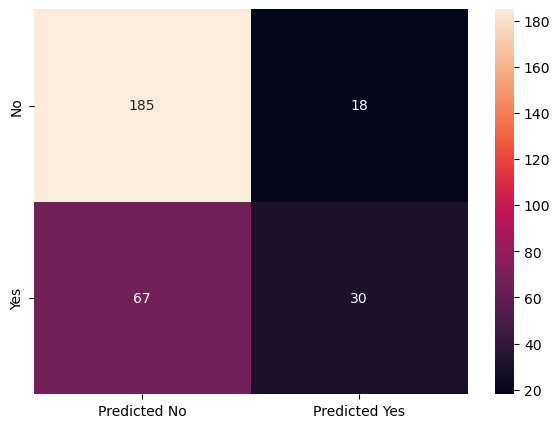

In [34]:
Y_predict=gbc1.predict(X_test)
print(gbc1.score(X_test,Y_test))
cm=metrics.confusion_matrix(Y_test,Y_predict,labels=[0,1])

df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']], columns=[i for i in ['Predicted No','Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

## Ensemble Learning-XGBoost

- It is extension of Gradient Boost technique.

In [35]:
# !pip install xgboost

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

0.7433333333333333


<AxesSubplot:>

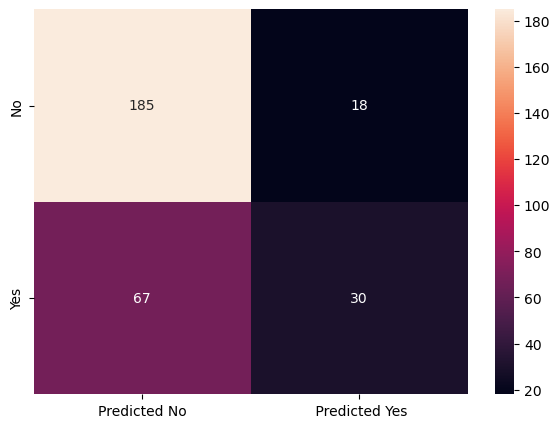

In [37]:
y_predict = xgb.predict(X_test)
print(xgb.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

You can perform hyperparameter tuning on the XGBoost model to get a better score.

## Ensemble RandomForest Classifier

In random forest we subset the rows to create different trees. Again while building the tree, we again randomly subset the initial subset to grow the tree further.

It needs to start with a complex model since it is a *Bagging* technique, so if you start with a simple tree with a depth of say 3, you will realise that the score will decrease. As you increase the depth, the performance will increase as well.
At some point the depth wouldn't matter to improve the performance anymore, even if you increase it. It is therefore advisable to allow the algorithm to choose the best depth by itself.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, Y_train)


0.74


<AxesSubplot:>

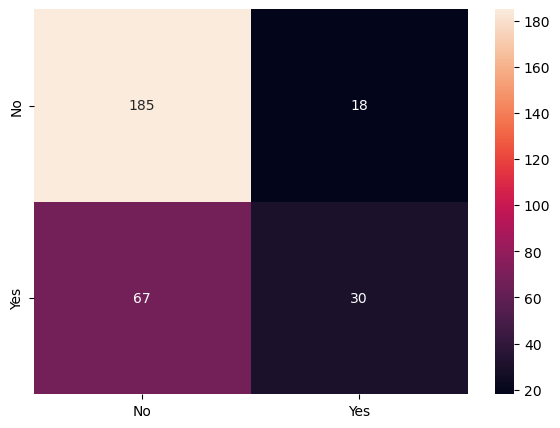

In [39]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, Y_test))
cm=metrics.confusion_matrix(Y_test, Y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Stacking

In [40]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
df=datasets.load_breast_cancer()

In [42]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [44]:
x=pd.DataFrame(columns=df.feature_names,data=df.data)

In [45]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
target={'Targets':df.target}

In [47]:
y=pd.DataFrame(target)

In [48]:
x.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [49]:
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


In [50]:
y.value_counts()

Targets
1          357
0          212
dtype: int64

- Data is balanced

In [51]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
xgb=xgboost.XGBClassifier()#use_label_encoder=False

clf=[('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)]

In [52]:
lr=LogisticRegression()

stack_model=StackingClassifier(estimators=clf,final_estimator=lr)
score=cross_val_score(stack_model,x,y.values.ravel(),cv=5,scoring='accuracy')

print('The final accuracy score is:',score.mean())

The final accuracy score is: 0.9736686849868033
